In [29]:
# Standard Libraries
import os
import sys

# Add the root directory to sys.path
sys.path.append(os.path.abspath('../..'))

# Importing modules from project
from src.data.make_dataset import create_dataset
from src.models.train_model import train_and_save, train_study_and_save, tune_and_save
from src.visualization.visualize import visualize_study, visualize_evaluate, visualize_train
from src.models.predict_model import evaluate_model, evaluate_model_opt_threshold, predict_model
from src.utils import set_seed, DEFAULT_SEED

**Create dataset for training, evaluating and tesing**

In [30]:
X_train, X_val, X_test, y_train, y_val, y_test = create_dataset(file_name="processed_data")

2025-03-17 02:25:07,869 - INFO - Loading data: processed_data


**Train the neural network model with custom hyperparameters**

In [31]:
# Set the random seed
set_seed(DEFAULT_SEED)

# Train and save the model with the specified hyperparameters
train_and_save(
            model_type="neural_network",
            model_name="neural_network_manual",
            X_train=X_train,
            y_train=y_train,
            X_val=X_val,
            y_val=y_val,
            hidden_size=15,
            num_hidden_layers=1,
            dropout_rate=0.5,
            lr=1e-3,
            weight_decay=1e-4,
            batch_size=32,
            epochs=50,
        )

Training neural_network with the following hyperparameters:
hidden_size: 15
num_hidden_layers: 1
dropout_rate: 0.5
lr: 0.001
weight_decay: 0.0001
batch_size: 32
epochs: 50


2025-03-17 02:25:10,078 - INFO - Epoch [10/50], Train Loss: 0.4223, Validation Loss: 0.4360
2025-03-17 02:25:12,170 - INFO - Epoch [20/50], Train Loss: 0.4149, Validation Loss: 0.4277
2025-03-17 02:25:14,544 - INFO - Epoch [30/50], Train Loss: 0.4064, Validation Loss: 0.4330
2025-03-17 02:25:16,767 - INFO - Epoch [40/50], Train Loss: 0.3986, Validation Loss: 0.4276
2025-03-17 02:25:18,936 - INFO - Epoch [50/50], Train Loss: 0.3969, Validation Loss: 0.4338
2025-03-17 02:25:18,938 - INFO - Training results saved to c:\Users\duyhu\Downloads\ML_Beginners\src\..\storage\trainings\ne_neural_network_manual.pkl.
2025-03-17 02:25:18,942 - INFO - Model saved to c:\Users\duyhu\Downloads\ML_Beginners\src\..\models\experiments\ne_neural_network_manual.pth


**Visualize the training and validation loss curves**

2025-03-17 02:25:18,951 - INFO - Loading training results from file: ne_neural_network_manual
2025-03-17 02:25:18,952 - INFO - Training ne_neural_network_manual loaded successfully.
2025-03-17 02:25:18,954 - INFO - Plotting loss curves.


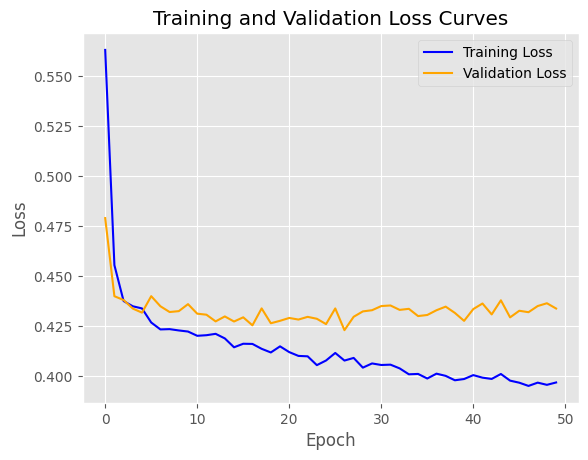

In [32]:
visualize_train(file_name="ne_neural_network_manual")

**Evaluate the custom model using custom threshold**

In [33]:
evaluate_model(file_name="ne_neural_network_manual", X_test=X_test, y_test=y_test, threshold=0.5)

2025-03-17 02:25:19,117 - INFO - Model ne_neural_network_manual loaded successfully.
2025-03-17 02:25:19,129 - INFO - Accuracy: 0.7989
2025-03-17 02:25:19,130 - INFO - Precision: 0.6270
2025-03-17 02:25:19,132 - INFO - Recall: 0.5387
2025-03-17 02:25:19,133 - INFO - F1: 0.5795
2025-03-17 02:25:19,134 - INFO - Roc_auc: 0.8351
2025-03-17 02:25:19,136 - INFO - Evaluation results saved to c:\Users\duyhu\Downloads\ML_Beginners\src\..\storage\evaluations\ne_neural_network_manual.pkl.


**Visualize the confusion matrix, ROC curve and AUC score, and Precision-Recall curve**

2025-03-17 02:25:19,145 - INFO - Loading evaluation results from file: ne_neural_network_manual
2025-03-17 02:25:19,146 - INFO - Evaluation ne_neural_network_manual loaded successfully.
2025-03-17 02:25:19,160 - INFO - Plotting confusion matrix.


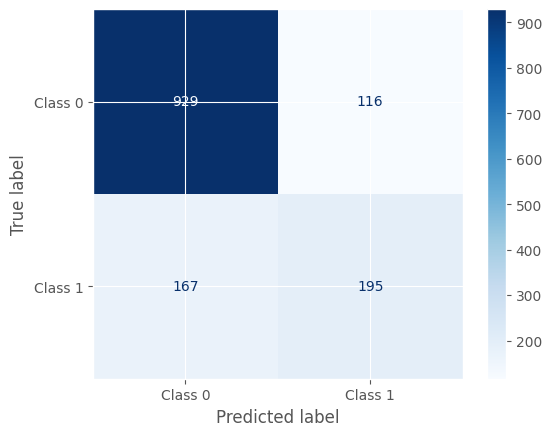

2025-03-17 02:25:19,277 - INFO - Plotting ROC curve and AUC score.


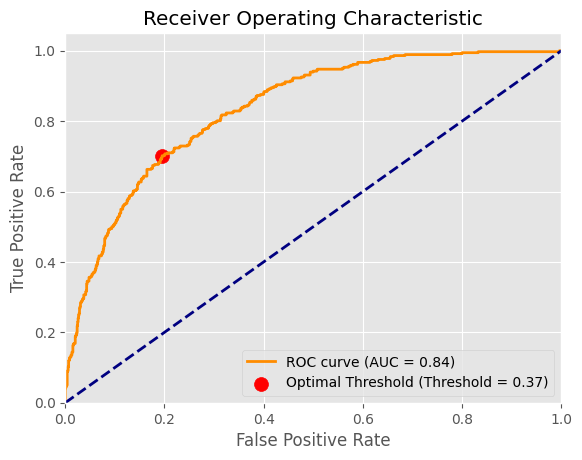

2025-03-17 02:25:19,417 - INFO - Plotting Precision-Recall curve.


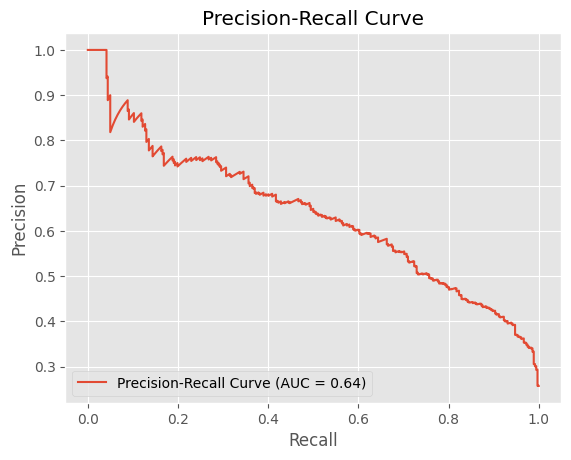

In [34]:
visualize_evaluate(file_name="ne_neural_network_manual")

**Optimize the model and save the optimal hyperparameters study**

In [35]:
# Set the random seed
set_seed(DEFAULT_SEED)

# Define the hyperparameter search space
search_space = {
    "lr": [1e-5, 1e-2],
    "batch_size": [16, 128],
    "hidden_size": [16, 128],
    "num_hidden_layers": [1, 3],
    "dropout_rate": [0.2, 0.5],
    "epochs": [10, 100],
    "weight_decay": [1e-5, 1e-3],
}

# hyperparameter tuning and save the best study
tune_and_save(
        model_type="neural_network",
        model_name="neural_network_study",
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        n_trials=50,
        direction="minimize",
        search_space=search_space
    )

[I 2025-03-17 02:25:19,550] A new study created in memory with name: no-name-a70d94c7-5df2-4bf2-88c7-433bcd2c2c25
[I 2025-03-17 02:25:22,448] Trial 0 finished with value: 0.47782915379061847 and parameters: {'lr': 0.0037516557872851516, 'batch_size': 123, 'hidden_size': 98, 'num_hidden_layers': 2, 'dropout_rate': 0.24680559213273096, 'epochs': 24, 'weight_decay': 6.750277604651747e-05}. Best is trial 0 with value: 0.47782915379061847.
[I 2025-03-17 02:25:32,614] Trial 1 finished with value: 0.4867717355270596 and parameters: {'lr': 0.008663099696291603, 'batch_size': 83, 'hidden_size': 96, 'num_hidden_layers': 1, 'dropout_rate': 0.4909729556485983, 'epochs': 85, 'weight_decay': 0.00022021571957149338}. Best is trial 0 with value: 0.47782915379061847.
[I 2025-03-17 02:25:41,154] Trial 2 finished with value: 0.44120008808340433 and parameters: {'lr': 0.0018264314223989354, 'batch_size': 36, 'hidden_size': 50, 'num_hidden_layers': 2, 'dropout_rate': 0.3295835055926347, 'epochs': 36, 'weig

2025-03-17 02:29:48,942 - INFO - Loading Optuna study from file: ne_neural_network_study
2025-03-17 02:29:48,943 - INFO - Study ne_neural_network_study loaded successfully.
2025-03-17 02:29:48,965 - INFO - Plotting optimization history for study.
c:\Users\duyhu\Downloads\ML_Beginners\src\visualization\visualize.py:37: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  fig = optuna.visualization.matplotlib.plot_optimization_history(study)


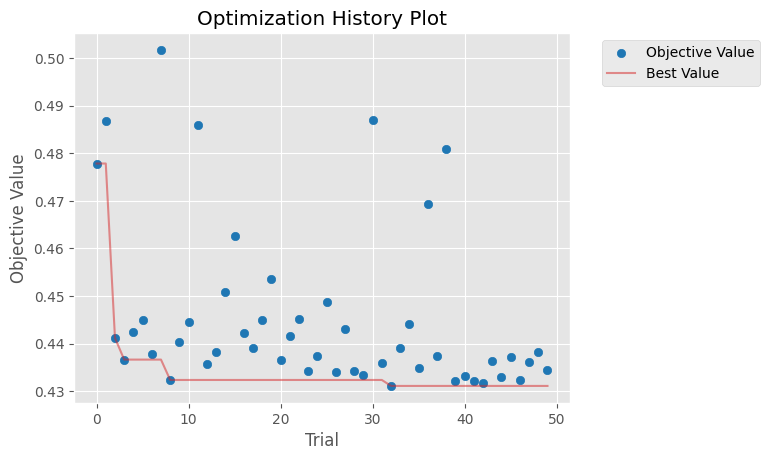

2025-03-17 02:29:49,131 - INFO - Plotting slice plot for study.
c:\Users\duyhu\Downloads\ML_Beginners\src\visualization\visualize.py:51: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  fig = optuna.visualization.matplotlib.plot_slice(study)


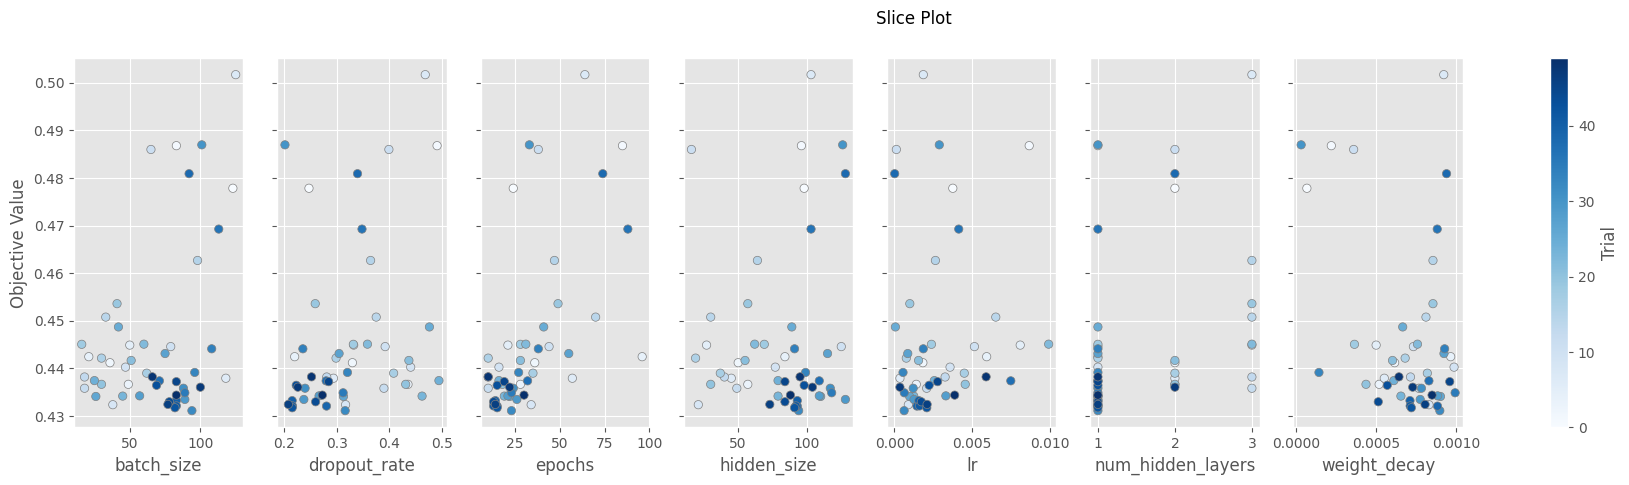

2025-03-17 02:29:49,644 - INFO - Plotting parameter importance for study.
c:\Users\duyhu\Downloads\ML_Beginners\src\visualization\visualize.py:65: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig = optuna.visualization.matplotlib.plot_param_importances(study)


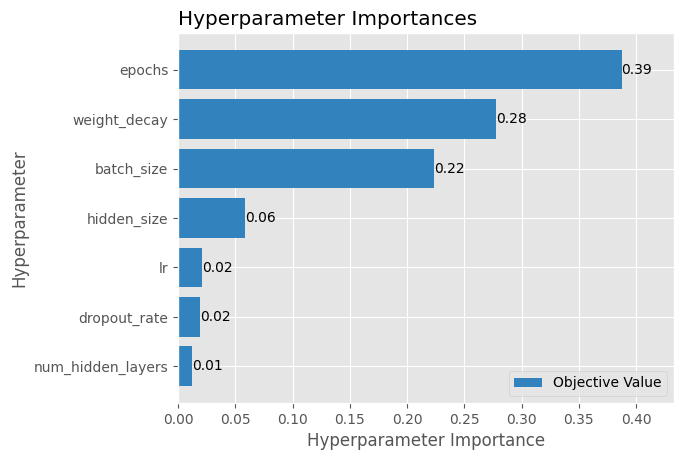

In [36]:
visualize_study("ne_neural_network_study")

**Train the neural network model using the optimal hyperparameters**

In [37]:
# Set the random seed
set_seed(DEFAULT_SEED)

# Train and save the model with the optimal  hyperparameters
train_study_and_save(
            model_type="neural_network",
            model_name="neural_network_study",
            X_train=X_train,
            y_train=y_train,
            X_val=X_val,
            y_val=y_val,
            file_name="ne_neural_network_study",
        )

2025-03-17 02:29:50,349 - INFO - Study ne_neural_network_study loaded successfully.


Training neural_network with the following hyperparameters:
lr: 0.0006238131333613247
batch_size: 94
hidden_size: 94
num_hidden_layers: 1
dropout_rate: 0.3157987439678077
epochs: 23
weight_decay: 0.0008980887234870114


2025-03-17 02:29:51,536 - INFO - Epoch [10/23], Train Loss: 0.4106, Validation Loss: 0.4262
2025-03-17 02:29:52,652 - INFO - Epoch [20/23], Train Loss: 0.3981, Validation Loss: 0.4268
2025-03-17 02:29:53,000 - INFO - Training results saved to c:\Users\duyhu\Downloads\ML_Beginners\src\..\storage\trainings\ne_neural_network_study.pkl.
2025-03-17 02:29:53,003 - INFO - Model saved to c:\Users\duyhu\Downloads\ML_Beginners\src\..\models\experiments\ne_neural_network_study.pth


2025-03-17 02:29:53,012 - INFO - Loading training results from file: ne_neural_network_study
2025-03-17 02:29:53,013 - INFO - Training ne_neural_network_study loaded successfully.
2025-03-17 02:29:53,016 - INFO - Plotting loss curves.


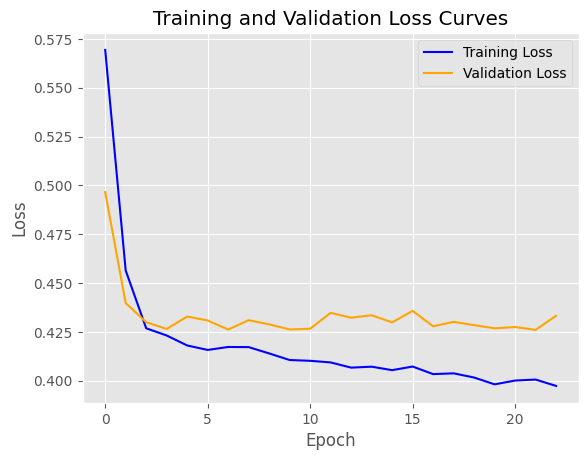

In [38]:
visualize_train("ne_neural_network_study")

**Evaluate optimal the model using custom threshold**

In [39]:
evaluate_model(file_name="ne_neural_network_study", X_test=X_test, y_test=y_test, threshold=0.5)

2025-03-17 02:29:53,173 - INFO - Model ne_neural_network_study loaded successfully.


2025-03-17 02:29:53,184 - INFO - Accuracy: 0.8045
2025-03-17 02:29:53,185 - INFO - Precision: 0.6399
2025-03-17 02:29:53,186 - INFO - Recall: 0.5497
2025-03-17 02:29:53,187 - INFO - F1: 0.5914
2025-03-17 02:29:53,187 - INFO - Roc_auc: 0.8432
2025-03-17 02:29:53,190 - INFO - Evaluation results saved to c:\Users\duyhu\Downloads\ML_Beginners\src\..\storage\evaluations\ne_neural_network_study.pkl.


2025-03-17 02:29:53,201 - INFO - Loading evaluation results from file: ne_neural_network_study
2025-03-17 02:29:53,202 - INFO - Evaluation ne_neural_network_study loaded successfully.
2025-03-17 02:29:53,214 - INFO - Plotting confusion matrix.


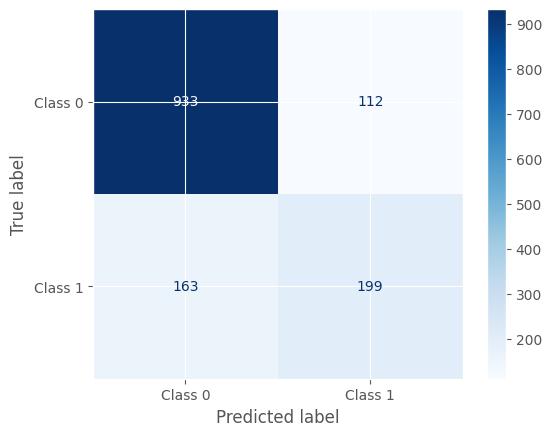

2025-03-17 02:29:53,331 - INFO - Plotting ROC curve and AUC score.


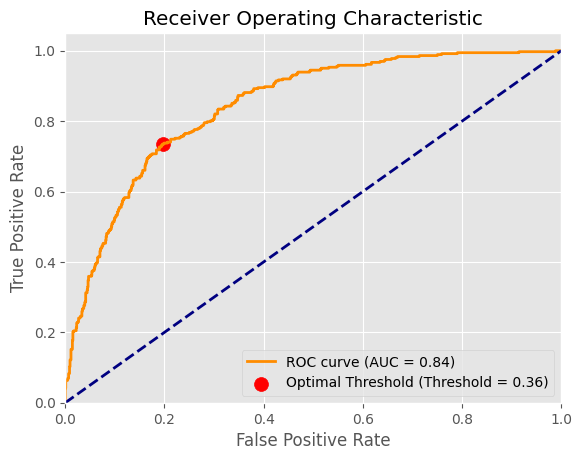

2025-03-17 02:29:53,466 - INFO - Plotting Precision-Recall curve.


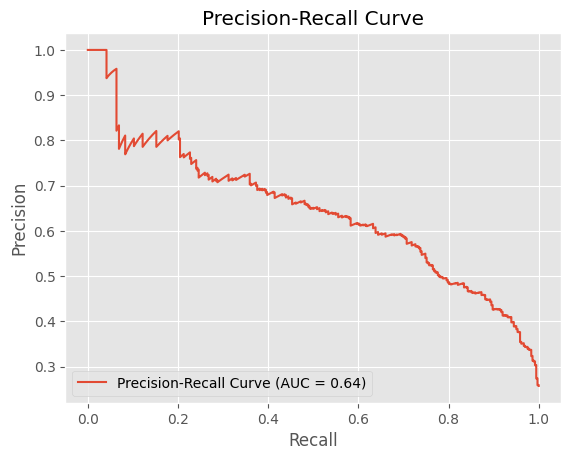

In [40]:
visualize_evaluate("ne_neural_network_study")

**Evaluate the model using the optimal threshold**

In [41]:
evaluate_model_opt_threshold(file_name="ne_neural_network_study", X_test=X_test, y_test=y_test)

2025-03-17 02:29:53,593 - INFO - Model ne_neural_network_study loaded successfully.
2025-03-17 02:29:53,596 - INFO - Optimal Threshold (Maximizing Youden's J): 0.3609
2025-03-17 02:29:53,608 - INFO - Accuracy: 0.7854
2025-03-17 02:29:53,609 - INFO - Precision: 0.5638
2025-03-17 02:29:53,610 - INFO - Recall: 0.7320
2025-03-17 02:29:53,610 - INFO - F1: 0.6370
2025-03-17 02:29:53,611 - INFO - Roc_auc: 0.8432
2025-03-17 02:29:53,614 - INFO - Evaluation results saved to c:\Users\duyhu\Downloads\ML_Beginners\src\..\storage\evaluations\ne_neural_network_study.pkl.


2025-03-17 02:29:53,623 - INFO - Loading evaluation results from file: ne_neural_network_study
2025-03-17 02:29:53,625 - INFO - Evaluation ne_neural_network_study loaded successfully.
2025-03-17 02:29:53,638 - INFO - Plotting confusion matrix.


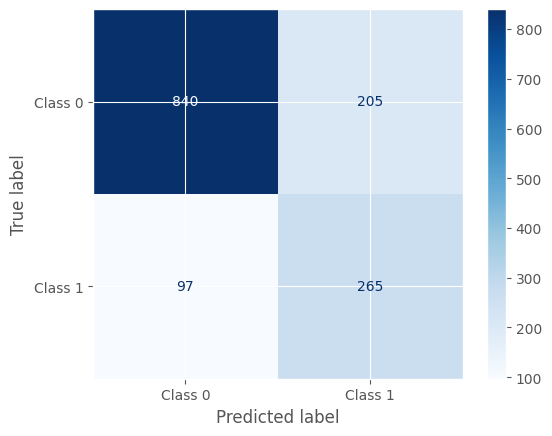

2025-03-17 02:29:53,773 - INFO - Plotting ROC curve and AUC score.


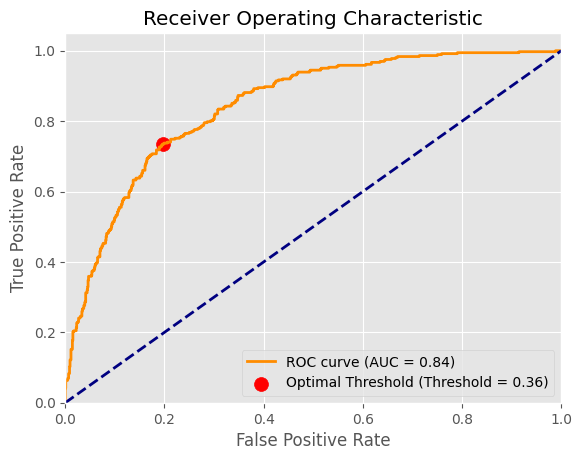

2025-03-17 02:29:53,900 - INFO - Plotting Precision-Recall curve.


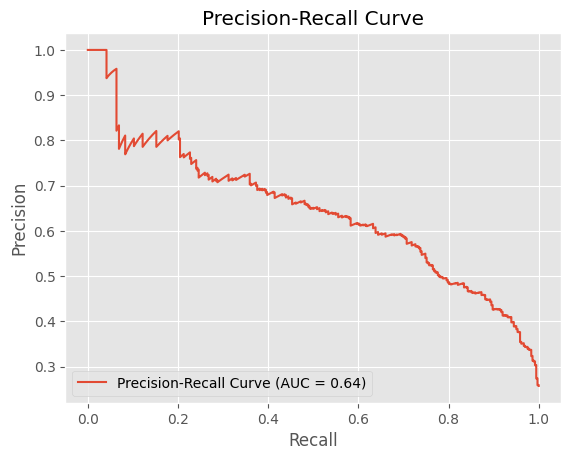

In [42]:
visualize_evaluate("ne_neural_network_study")